# Exploratory Data Analysis & Intro
Goal

* Investigate top-paying roles and skills in the data science industry.
* Use Python to explore a real-live dataset on job postings.
* For job-seekers: use these insights to help find the best job opportunities.

Final Deliverables:

* Create Jupyter Notebookss (showcasing core skills in Python).
* Create a summary page (via README.md) capturing your findings.
* Share this project via GitHub & LinkedIn.

Questions to Answer

* What are the most demanded skills for the top 3 most popular data roles?
* How are in-demand skills trending for Data Analysts?
* How well do jobs and skills pay for Data Analysts?
* What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)
* I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:

Exploratory Data Analysis for all Data Roles
Roles to Explore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# Load the dataset
data = load_dataset("lukebarousse/data_jobs")

# Convert the train split to a pandas DataFrame
df = data["train"].to_pandas()

# Convert job_posted_date to datetime format
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Convert job_skills from string representation of list to actual list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\aumee\anaconda3\envs\Py\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Roles to Explore

In [45]:
job_count=df['job_title_short'].value_counts().reset_index(name='count')

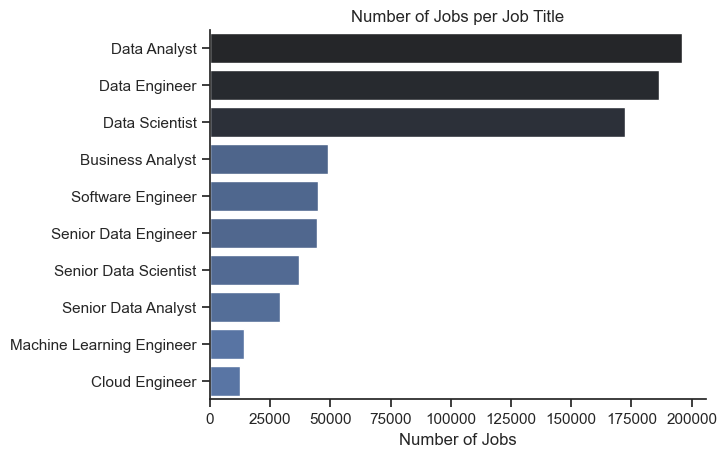

In [23]:
sns.set_theme(style='ticks')
sns.barplot(data=job_count, x='count', y='index', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Job Opportunities

In [25]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

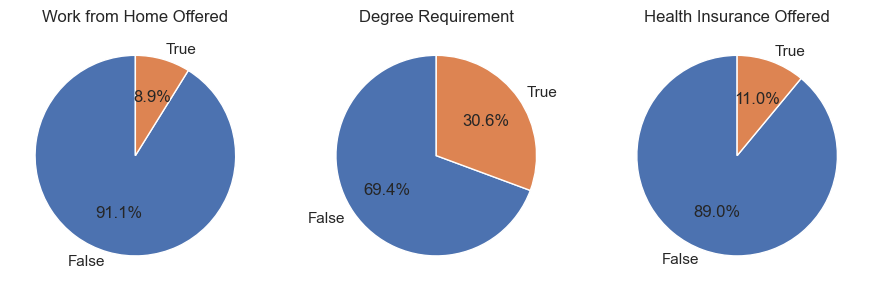

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# Companies to Explore

In [41]:
df_company=df['company_name'].value_counts().sort_values(ascending=False).reset_index(name='count')[1:].head(20)

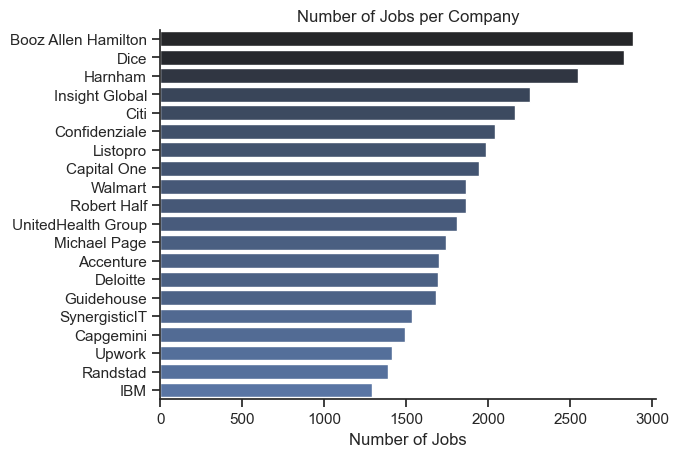

In [43]:
sns.set_theme(style='ticks')
sns.barplot(data=df_company, x='count', y='index', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Countries to Explore

In [ ]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Exploratory Data Analysis for Data Analysts in US

In [47]:
df_DA_US = df[(df['job_country'] =='United States') & (df['job_title_short'] == 'Data Analyst')]

In [81]:
df_loc=df_DA_US['job_location'].value_counts().sort_values(ascending=False).reset_index(name='count').head(10)

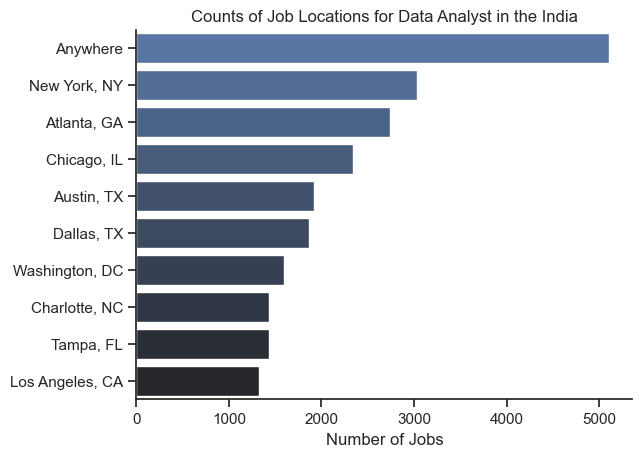

In [83]:
sns.set_theme(style='ticks')
sns.barplot(data=df_loc, x='count', y='index', hue='index', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

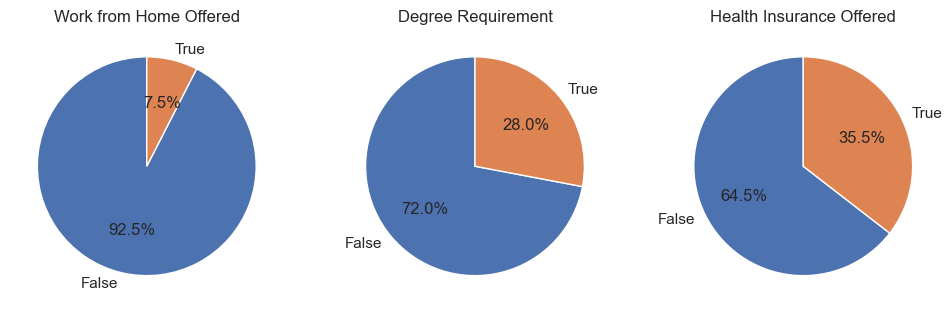

In [85]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

# Companies to explore

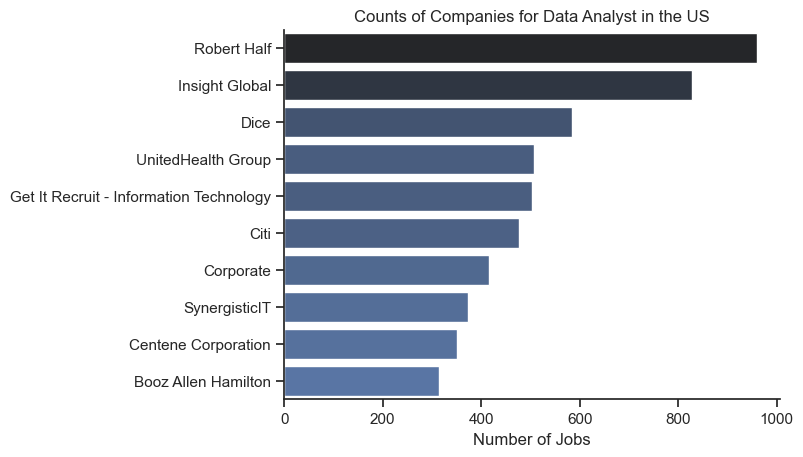

In [95]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='company_name', y=df_plot.index, hue='company_name', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()